# Hearth disease predicting
In this project I would like to create  and train classification model using Python machine learning and data science libraries. We would like to predict if someone has a hearth disease based on medical attributes.
We want to get at least 95% accuracy at predicting with our model.

## 1. Problem Definition
Can we predict if with the clinical parameters about a patient whether or not they have hearth disease?


I will use models and tools given from sckit-learn:
https://scikit-learn.org/stable/index.html


In [1]:
# import all tools we need

#Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Models from Sckit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             precision_score, 
                             recall_score, 
                             f1_score,
                             RocCurveDisplay)
from sklearn.metrics import ConfusionMatrixDisplay

# Saving model
from joblib import dump

Our project will use medical records from kaggle: 
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

Informations about data:
* age
* sex (1 = male; 0 = female)
* cp: chest pain type (4 values)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: resting electrocardiographic results (values 0,1,2)
* talach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values

## 2. Load and explore data
After loading data we want to explore it, and find out more about data.

In this section we will check different columns and look how they influence on target variable

In [2]:
hearth_disease = pd.read_csv('data/heart.csv')
hearth_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Checking now many of each class is there
hearth_disease['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

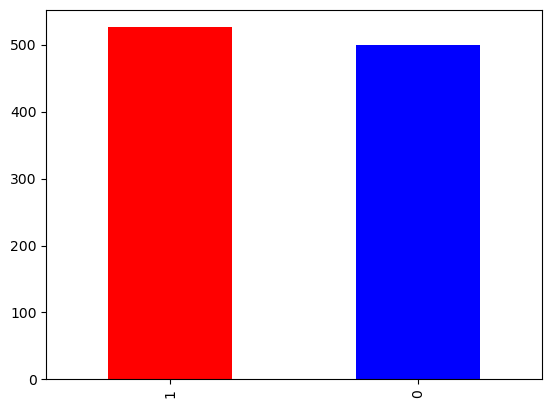

In [4]:
hearth_disease['target'].value_counts().plot(kind='bar', color=['red','blue']);

In [5]:
# Verification for empty rows
hearth_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###  2.1 Hearth Disease Frequendy according to Sex

In [6]:
hearth_disease.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [7]:
# Compare target columns with sex column
pd.crosstab(hearth_disease.target, hearth_disease.sex)

sex,0,1
target,,
0,86,413
1,226,300


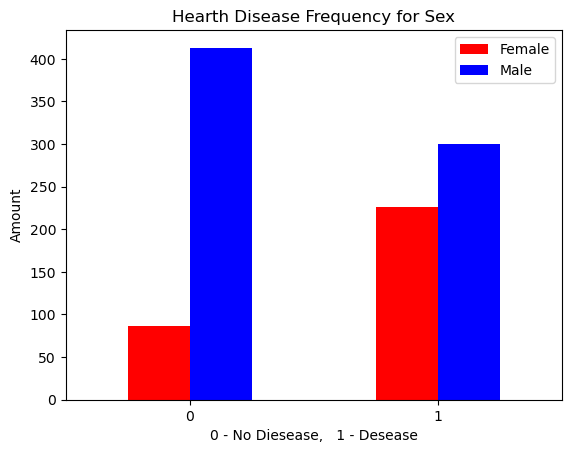

In [8]:
# Creating plot of crosstab
pd.crosstab(hearth_disease.target, hearth_disease.sex).plot(kind='bar',
                                                            color=['red','blue']);
plt.title("Hearth Disease Frequency for Sex")
plt.xlabel('0 - No Diesease,   1 - Desease')
plt.ylabel("Amount")
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

### 2.2 Hearth Disease - Cholesterol vs Age


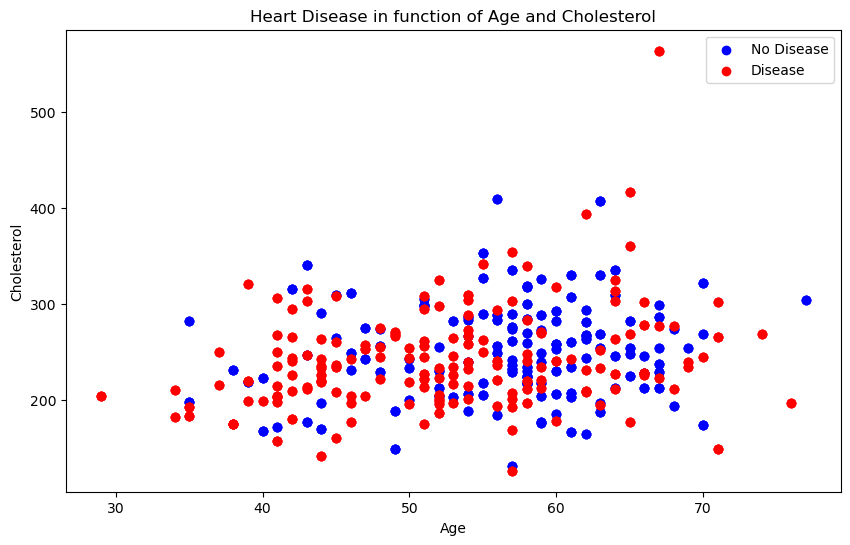

In [9]:
# Create figure
plt.figure(figsize=(10,6))

# Scatter with negative examples
plt.scatter(hearth_disease.age[hearth_disease.target==0],
            hearth_disease.chol[hearth_disease.target==0],
            c='blue');

# Scatter with positive examples
plt.scatter(hearth_disease.age[hearth_disease.target==1],
            hearth_disease.chol[hearth_disease.target==1],
            c='red');
#Info
plt.title("Heart Disease in function of Age and Cholesterol")
plt.xlabel('Age')
plt.ylabel("Cholesterol")
plt.legend(['No Disease','Disease']);

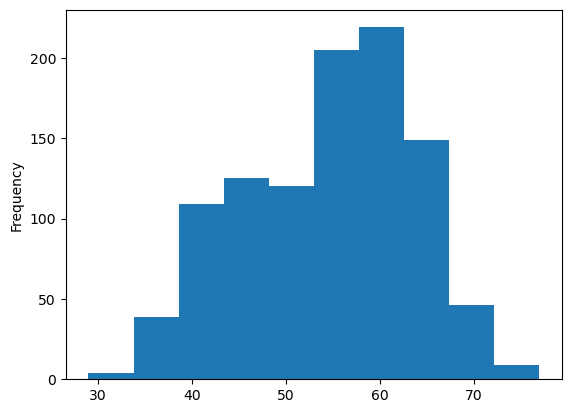

In [10]:
# Checking distriboution of the age column with a histogram
hearth_disease.age.plot.hist();

### 2.3 Hearth Disease Frequendy according to Fasting Blood Sugar(> 120 mg/dl (1 = true; 0 = false)

In [11]:
# Compare target columns with sex column
pd.crosstab(hearth_disease.target, hearth_disease.fbs)

fbs,0,1
target,,
0,417,82
1,455,71


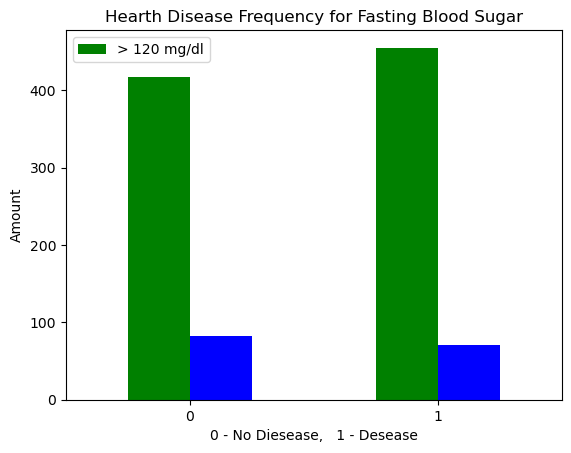

In [12]:
# Creating plot of crosstab
pd.crosstab(hearth_disease.target, hearth_disease.fbs).plot(kind='bar',
                                                            color=['green','blue']);
plt.title("Hearth Disease Frequency for Fasting Blood Sugar")
plt.xlabel('0 - No Diesease,   1 - Desease')
plt.ylabel("Amount")
plt.legend(["> 120 mg/dl"])
plt.xticks(rotation=0);

### 2.4 Correlation matrix

In [13]:
# Make a correlation matrix
hearth_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


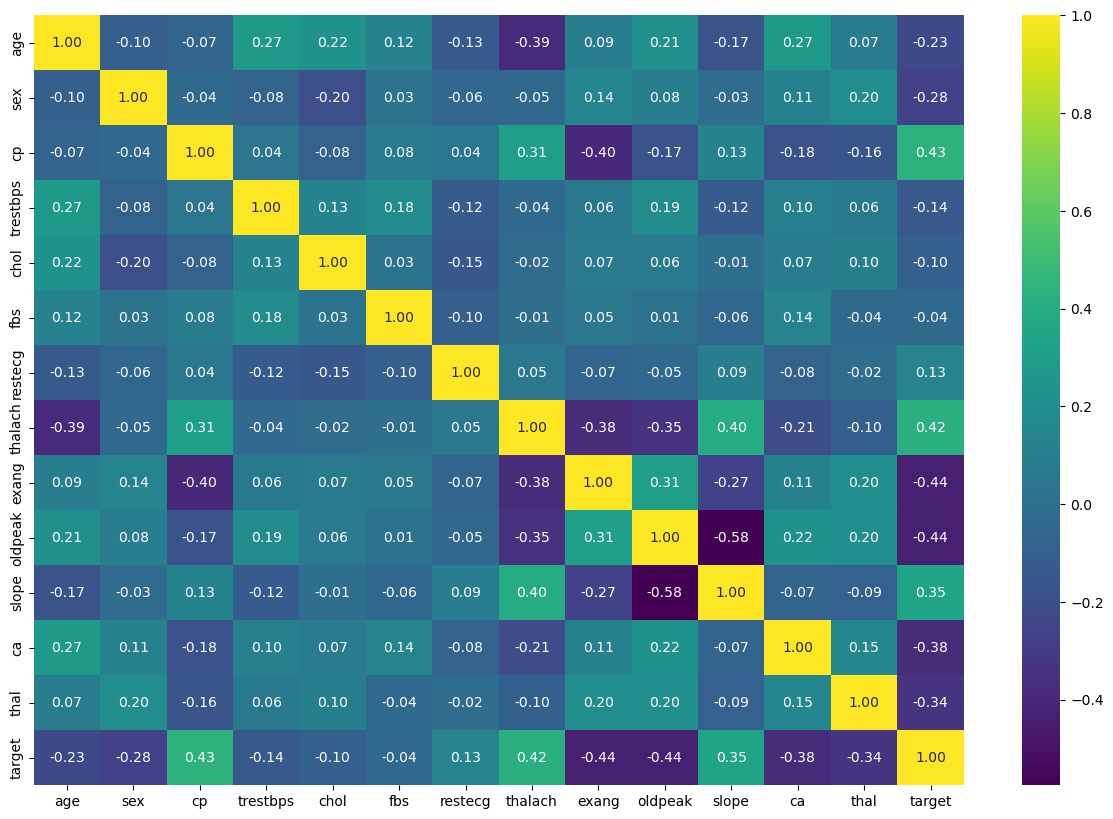

In [14]:
# Using seaborn to visually create correlation matrix
correlation_matrix = hearth_disease.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 fmt=".2f",
                 cmap="viridis"
                 )

## 3. Modelling

In [15]:
hearth_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
# To work with model we must split data into X(variables) and y(target)
X = hearth_disease.drop("target", axis=1)
y = hearth_disease["target"]

Split data into test and train data. We will use Sckit-learn `train_test_split`

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)# dajemy 20% danych do zbioru testowego



After split we check the map from Sckit-Learn to find best model for our problem:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

I'll use RandomForestClassifier

In [18]:
# Assing model
clf = RandomForestClassifier()

# Fitting data
clf.fit(X_train, y_train)

# making predictions
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
# Nic nam to jeszcze nie mówi więc sprawdzamy wynik(score)
clf.score(X_test,y_test)

0.9804878048780488

RandomForestClassifier works really good, instantly beat our assumed goal (95%). 

### 3.1 Different models
But we still want to try other models to check if ther is an option to beat RandomForestClassifier:
* RandomForestClassifier (comparisons)
* KNeighborsClassifier
* NuSVC
* LogisticRegression
* SVC

In [20]:
# Dict with models
models = {"RandomForestClassifier": RandomForestClassifier(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "NuSVC": NuSVC(),
          "LogisticRegression": LogisticRegression(solver='liblinear'), # wartość domyśla wywalała błąd iteracji niezależnie od zmiany
          "SVC": SVC()}

# Empty dict for scores
results={}


Every used by us model use the same `fit()` and `score()`, we will make loop for them

In [21]:
for model_name, model in models.items():
    model.fit(X_train,y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

{'RandomForestClassifier': 0.9804878048780488,
 'KNeighborsClassifier': 0.7560975609756098,
 'NuSVC': 0.8439024390243902,
 'LogisticRegression': 0.8585365853658536,
 'SVC': 0.697560975609756}

Lets plot our scores

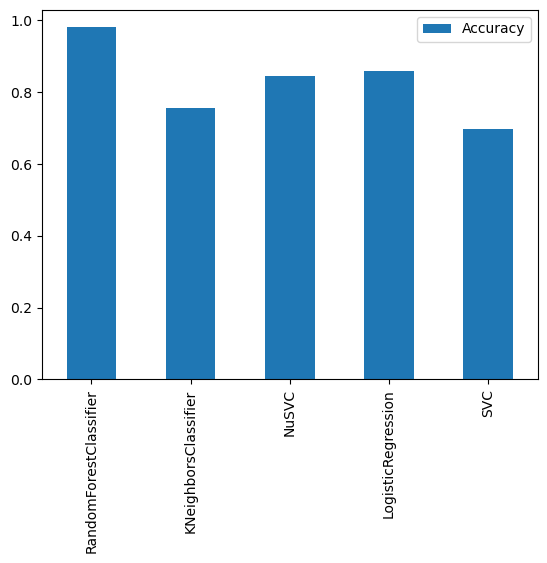

In [22]:
results_hearth = pd.DataFrame(results.values(),
                              results.keys(),
                              columns=["Accuracy"])
results_hearth.plot.bar();

As we see, anyone cant beat RandomForestClassifier in predictiong. Lets check, if changing hyperparameters will make anny difference.

## 4. Change hyperparameters
For now we will leave RandomForestClassifier and try improve some other models to try make their predictions better.

### 4.1.1 Tuning SVC

In [23]:
# Update SVC
train_SVC_scores = []
test_SVC_scores = []

# Creating a list of different values for kernel
kernels=['linear','poly', 'rbf','sigmoid']
SVC_model = SVC()

#loop through different kernels
for ker in kernels:
    SVC_model.set_params(kernel=ker)
    
    #Fit algorithm
    SVC_model.fit(X_train, y_train)
    
    #Update training scores list
    train_SVC_scores.append(SVC_model.score(X_train,y_train))
    
    #Update test scores list
    test_SVC_scores.append(SVC_model.score(X_test,y_test))

In [24]:
train_SVC_scores
          

[0.8402439024390244,
 0.7085365853658536,
 0.6926829268292682,
 0.5378048780487805]

In [25]:
test_SVC_scores

[0.848780487804878, 0.7268292682926829, 0.697560975609756, 0.5609756097560976]

Maximum SVC score on the test data: 84.88%


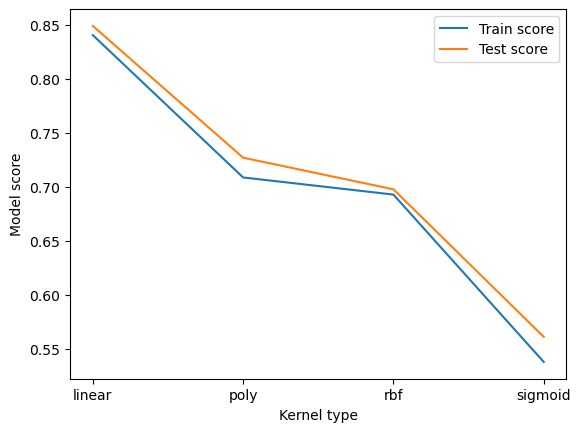

In [26]:
# Let's plot our scores
plt.plot(kernels, train_SVC_scores, label = "Train score")
plt.plot(kernels, test_SVC_scores, label = "Test score")
plt.xlabel("Kernel type")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum SVC score on the test data: {max(test_SVC_scores)*100:.2f}%")

In [27]:
print(f'As we see, our first base SVC model with:{results["SVC"]*100:.2f}% was tuned to: {max(test_SVC_scores)*100:.2f}%')

As we see, our first base SVC model with:69.76% was tuned to: 84.88%


### 4.1.2 Tune NuSVC
We will use same method as before

In [28]:
# Update NuSVC
train_NuSVC_scores = []
test_NuSVC_scores = []

# Creating a list of different values for kernel
kernels=['linear','poly', 'rbf','sigmoid']
NuSVC_model = NuSVC()

#loop through different kernels
for ker in kernels:
    NuSVC_model.set_params(kernel=ker)
    
    #Fit algorithm
    NuSVC_model.fit(X_train, y_train)
    
    #Update training scores list
    train_NuSVC_scores.append(NuSVC_model.score(X_train,y_train))
    
    #Update test scores list
    test_NuSVC_scores.append(NuSVC_model.score(X_test,y_test))

In [29]:
train_NuSVC_scores

[0.8414634146341463,
 0.8341463414634146,
 0.8353658536585366,
 0.5060975609756098]

In [30]:
test_NuSVC_scores

[0.848780487804878, 0.8536585365853658, 0.8439024390243902, 0.5170731707317073]

Maximum NuSVC score on the test data: 84.88%


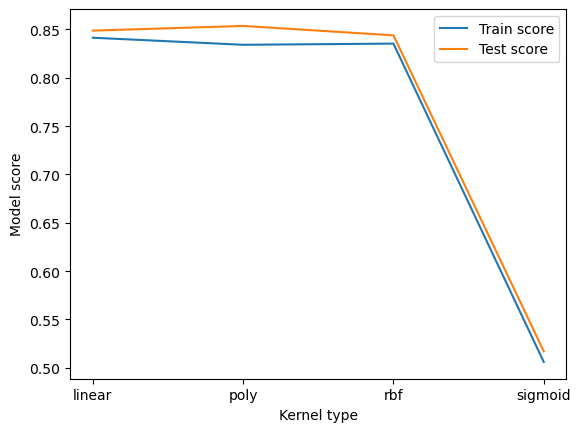

In [31]:
# Let's plot our scores
plt.plot(kernels, train_NuSVC_scores, label = "Train score")
plt.plot(kernels, test_NuSVC_scores, label = "Test score")
plt.xlabel("Kernel type")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum NuSVC score on the test data: {max(test_SVC_scores)*100:.2f}%")

In [32]:
print(f'As we see, our first base NuSVC model with:{results["NuSVC"]*100:.2f}% was tuned to: {max(test_SVC_scores)*100:.2f}%')

As we see, our first base NuSVC model with:84.39% was tuned to: 84.88%


### 4.1.3 Tune KNeighborsClassifier

In [33]:
# Update KNeighborsClassifier
train_KNN_scores = []
test_KNN_scores = []

# Creating a list of different values for n_neighbors (default was 5)
neighbors = range(3,21) # for lower n_neighbors i think model will be overfitting
KNN_model = KNeighborsClassifier()

#loop through different kernels
for i in neighbors:
    KNN_model.set_params(n_neighbors=i)
    
    #Fit algorithm
    KNN_model.fit(X_train, y_train)
    
    #Update training scores list
    train_KNN_scores.append(KNN_model.score(X_train,y_train))
    
    #Update test scores list
    test_KNN_scores.append(KNN_model.score(X_test,y_test))

In [34]:
train_KNN_scores

[0.9926829268292683,
 0.9512195121951219,
 0.9280487804878049,
 0.824390243902439,
 0.7975609756097561,
 0.775609756097561,
 0.7426829268292683,
 0.7524390243902439,
 0.7621951219512195,
 0.776829268292683,
 0.7585365853658537,
 0.7548780487804878,
 0.748780487804878,
 0.7390243902439024,
 0.7439024390243902,
 0.7536585365853659,
 0.7475609756097561,
 0.7524390243902439]

In [35]:
test_KNN_scores

[0.9073170731707317,
 0.8,
 0.7560975609756098,
 0.7658536585365854,
 0.7463414634146341,
 0.7317073170731707,
 0.7414634146341463,
 0.7317073170731707,
 0.751219512195122,
 0.775609756097561,
 0.751219512195122,
 0.7365853658536585,
 0.7609756097560976,
 0.7658536585365854,
 0.7658536585365854,
 0.7463414634146341,
 0.7317073170731707,
 0.7024390243902439]

Maximum SVC score on the test data: 90.73%


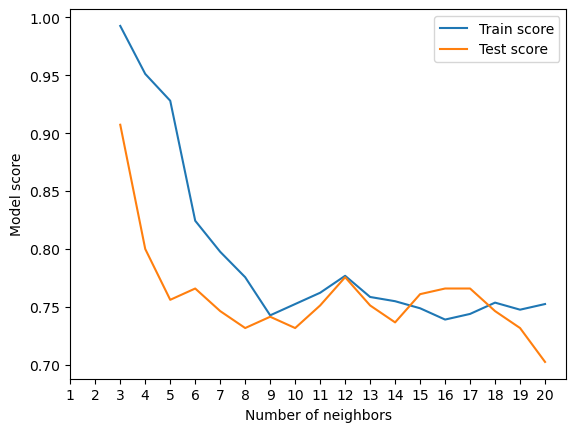

In [36]:
# plot scores
plt.plot(neighbors, train_KNN_scores, label = "Train score")
plt.plot(neighbors, test_KNN_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum SVC score on the test data: {max(test_KNN_scores)*100:.2f}%")

In [37]:
print(f'As we see, our first base KNeighborsClassifier model with:{results["KNeighborsClassifier"]*100:.2f}% was tuned to: {max(test_KNN_scores)*100:.2f}%')

As we see, our first base KNeighborsClassifier model with:75.61% was tuned to: 90.73%


## 4.2 Hyperparameters tuning with RandomizedSearchCV

Now we will use RandomizedSearchCV to tune:
 * RandomForestClassifier()
 * LogisticRegression()

In [38]:
RandomForestClassifier().get_params(), LogisticRegression().get_params()

({'bootstrap': True,
  'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 'sqrt',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False},
 {'C': 1.0,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': None,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False})

In [39]:
# Makeing grid for RandomForestClassifier
rand_cls_grid = {"criterion":["gini", "entropy", "log_loss"],
                 "max_features":["sqrt", "log2", None],
                 "n_estimators":np.arange(10,1000,50)} 
# Makeing grid for LogisticRegression
log_cls_grid = {'C': np.logspace(-4,4,20),
               'solver':['liblinear', 'newton-cg', 'newton-cholesky']} 


Now lets use this hyperparameters to upgrade our models

In [40]:
# RandomizedSearchCV()

rand_cls_reg = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=rand_cls_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fitting data
rand_cls_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

Lets see best scores for RandomForestClassifier

In [41]:
rand_cls_reg.best_params_

{'n_estimators': 810, 'max_features': 'log2', 'criterion': 'log_loss'}

In [42]:
rand_cls_reg.score(X_test,y_test)

0.9804878048780488

In [43]:
print(f'As we see, our first base RandomForestClassifier model with:{results["RandomForestClassifier"]*100:.2f}% stays the same for best hyperparams')

As we see, our first base RandomForestClassifier model with:98.05% stays the same for best hyperparams


In [44]:
# LogisticRegression()


log_cls_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                 param_distributions=log_cls_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fitting data
log_cls_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'newton-cg',
                                                   'newton-cholesky']},
                   verbose=True)

In [45]:
log_cls_reg.best_params_

{'solver': 'newton-cholesky', 'C': 0.03359818286283781}

In [46]:
log_cls_reg.score(X_test,y_test)

0.8682926829268293

In [47]:
print(f'As we see, our first base LogisticRegression model with:{results["LogisticRegression"]*100:.2f}%  was tuned to: {log_cls_reg.score(X_test,y_test)*100:.2f}%')

As we see, our first base LogisticRegression model with:85.85%  was tuned to: 86.83%


## 5.Evaluation
Score for RandomForestClassifier() has not changed and its still our best model. In this point we will focus on making some evaluations:
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* RocCurveDisplay

In [48]:
# Confusion matrix
confusion_matrix(y_test,y_preds)

array([[ 98,   4],
       [  0, 103]], dtype=int64)

Lets make visualization

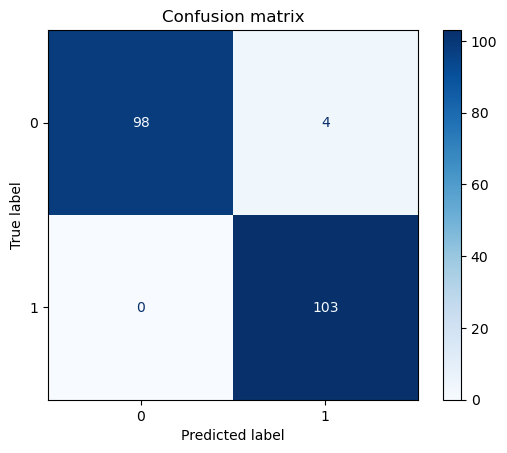

In [49]:

# Plot non-normalized confusion matrix

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=None,
    cmap=plt.cm.Blues,
)
disp.ax_.set_title("Confusion matrix")
plt.show();

In [50]:
# maing classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.96      1.00      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [51]:
# Finding precision score using precision_score()
print(precision_score(y_test,y_preds))

0.9626168224299065


In [52]:
#  Recall score
print(recall_score(y_test,y_preds))

1.0


In [53]:
# F1 score
print(f1_score(y_test,y_preds))

0.9809523809523809


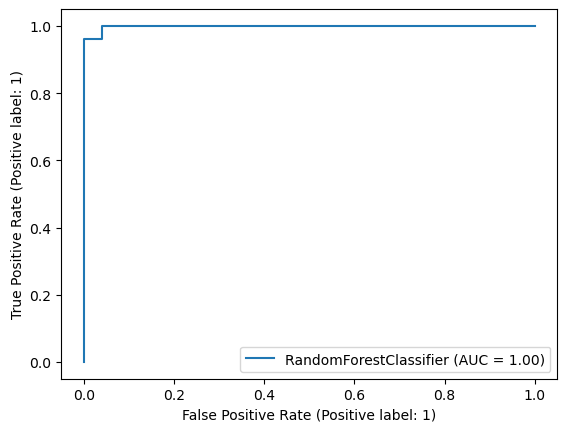

In [54]:
# Plot ROC curve using RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test);

In the end we will save so good prospering model for future use. lets use `joblib`

In [57]:
dump(clf, 'hearth_disease_clf.joblib')

['hearth_disease_clf.joblib']


# Project works better than assuming(95%) to over 98%.